In [1]:
%config InlineBackend.figure_format = 'svg'

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import pandas as pd
import numpy as np

# load data
x, y = load_wine(return_X_y=True, as_frame=True)

In [2]:
x.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
# normalize values to same range (0, 1)
scaler = MinMaxScaler() 
scaled = scaler.fit_transform(x)
x = pd.DataFrame(scaled)

# split data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# sort values
x_test['y'] = y_test
x_test = x_test.sort_values(by=['y'])
y_test = x_test['y']
x_test = x_test.drop(columns=['y'])

# create classifier and learn it
clf = SVC()
clf.fit(x_train, y_train)

# predict
y_predicted = clf.predict(x_test)

print(classification_report(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


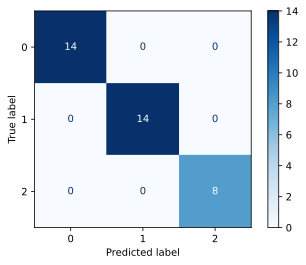

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

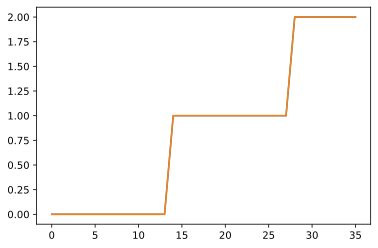

In [5]:
plt.plot(range(y_predicted.size), y_predicted)
plt.plot(range(y_test.size), y_test)

plt.show()

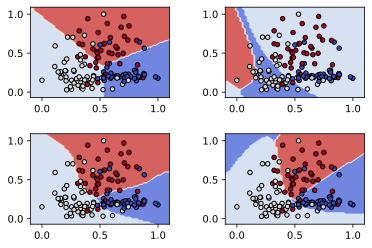

In [6]:
def make_meshgrid(x, y, step = 0.02):
  x_min, x_max = x.min() - 0.1, x.max() + 0.1
  y_min, y_max = y.min() - 0.1, y.max() + 0.1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
  return xx, yy

def plot_contours(axis, clf, x, y, **params):
  Z = clf.predict(np.c_[x.ravel(), y.ravel()])
  Z = Z.reshape(x.shape)
  out = axis.contourf(x, y, Z, **params)
  return out


x_train = x_train.to_numpy()[:, :2]
y_train = y_train.to_numpy()

models = (
  SVC(kernel="linear"),
  SVC(kernel="sigmoid"),
  SVC(kernel="rbf"),
  SVC(kernel="poly"),
)

models = (clf.fit(x_train, y_train) for clf in models)

titles = (
  "SVC with linear kernel",
  "SVC with sigmoid kernel",
  "SVC with RBF kernel",
  "SVC with polynomial kernel",
)

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0 = x_train[:, 0]
X1 = x_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

plt.show()